In [48]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as pt
%matplotlib inline 
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans

In [49]:
iris=pd.read_csv(r"C:\Users\ravip\Desktop\anaconda\read_csv\Iris.csv")

In [50]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
iris.shape

(150, 6)

In [52]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [53]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [54]:
print (iris.Species)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [55]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [56]:
iris.drop(['Id'],axis=1,inplace=True)


In [57]:
kmeans=KMeans(n_clusters=4)

In [58]:
iris['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [59]:
x=iris.iloc[:, :-1].values
y=iris.iloc[:, 1].values


In [60]:
SSE=[]

In [65]:
for cluster in range(1,20):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

In [66]:
frame=pd.DataFrame({"Cluster":range(1,20),"SSE":SSE})

ValueError: arrays must all be same length

In [67]:
pt.figure(figsize=(12,6))
pt.plot(frame["Cluster"],frame["SSE"],marker="o")
pt.xlabel("No of Clusters")
pt.ylabel("Inertia")

KeyError: 'SSE'

<Figure size 864x432 with 0 Axes>

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(x)

In [69]:
pd.DataFrame(iris_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [70]:
SSE

[57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.31787321428571,
 57.34492380952382,
 680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 39.185257692307694,
 34.198464618714624,
 29.955568877177576,
 27.93281419457736,
 26.620384533743234,
 24.725343577990635,
 22.939184343434345,
 21.685437229437234,
 20.0588195970696,
 19.027710807768088,
 18.23431601731602,
 17.54430266955267,
 16.387139610389614,
 15.226255494505494,
 680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.567464523257364,
 29.881402210510913,
 27.97095297512945,
 26.961042780748663,
 24.79851631701632,
 23.290771793565916,
 2

In [71]:
SSE_scaled=[]

In [72]:
for cluster in range(1,20):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster)
    kmeans.fit(iris_scaled)
    SSE_scaled.append(kmeans.inertia_)

In [73]:
pt.figure(figsize=(12,6))
pt.plot(frame["Cluster"],frame["SSE"],marker="o")
pt.xlabel("No of Clusters")
pt.ylabel("Inertia")

KeyError: 'SSE'

<Figure size 864x432 with 0 Axes>

In [74]:
kmeans=KMeans( n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(iris_scaled)
pred=kmeans.predict(iris_scaled)

In [75]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [76]:
frame=pd.DataFrame(iris_scaled)

In [77]:
frame["Cluster"]=pred

In [78]:
frame["Cluster"].value_counts()

2    53
1    50
0    47
Name: Cluster, dtype: int64

In [79]:
frame.head()

,0,1,2,3,Cluster
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


ValueError: x and y must be the same size

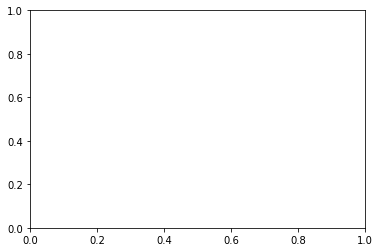

In [80]:
pt.scatter(x[pred==1,1],x[pred==0,1],s=50,color='purple',label = 'Iris-setosa')
pt.scatter(x[pred==1,0],x[pred==1,1],s=50,color='orange',label='Iris-versicolor')
pt.scatter(x[pred==2,0],x[pred==2,1],s=50,color='red',label= 'Iris-virginica')


pt.ylabel("PetalLengthCm")
pt.xlabel("SepalLengthCm")
pt.title(" Petal Vs Sepal (Length,cm)")
pt.plot()

[]

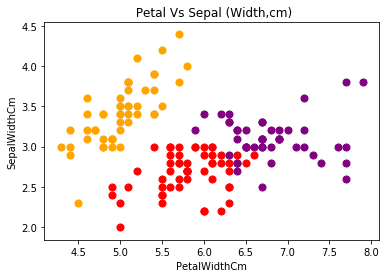

In [81]:


pt.scatter(x[pred==0,0],x[pred==0,1],s=50,color='purple',label = 'Iris-setosa')
pt.scatter(x[pred==1,0],x[pred==1,1],s=50,color='orange',label='Iris-versicolor')
pt.scatter(x[pred==2,0],x[pred==2,1],s=50,color='red',label= 'Iris-virginica')


pt.xlabel("PetalWidthCm")
pt.ylabel("SepalWidthCm")
pt.title(" Petal Vs Sepal (Width,cm)")
pt.plot()

[]

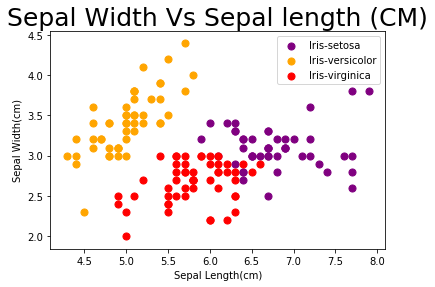

In [82]:
pt.scatter(x[pred==0,0],x[pred==0,1],s=50,color='purple',label = 'Iris-setosa')
pt.scatter(x[pred==1,0],x[pred==1,1],s=50,color='orange',label='Iris-versicolor')
pt.scatter(x[pred==2,0],x[pred==2,1],s=50,color='red',label= 'Iris-virginica')

pt.xlabel("Sepal Length(cm)")
pt.ylabel("Sepal Width(cm)")
pt.title("Sepal Width Vs Sepal length (CM)",size="25")
pt.legend()
pt.plot()

ValueError: x and y must be the same size

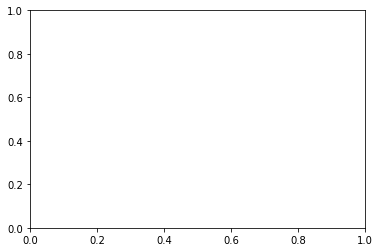

In [83]:








pt.scatter(x[pred==1,0],x[pred==0,1],s=50,color='purple',label = 'Iris-setosa')
pt.scatter(x[pred==2,0],x[pred==1,1],s=50,color='orange',label='Iris-versicolor')
pt.scatter(x[pred==3,0],x[pred==2,1],s=50,color='red',label= 'Iris-virginica')

pt.xlabel("Petal Length")
pt.ylabel("Petal Width")
pt.title("Petal Width Vs Petal length (CM),size=25")
pt.legend()
pt.plot()

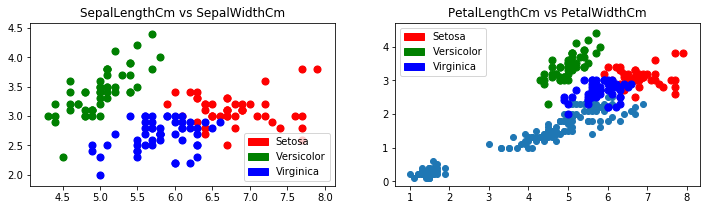

In [84]:


pt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])





pt.subplot(1, 2, 1)
pt.scatter(P['SepalLengthCm'], P['SepalWidthCm'])
pt.title('SepalLengthCm vs SepalWidthCm')
pt.legend(handles=[red_patch, green_patch, blue_patch])

pt.scatter(x[pred==0,0],x[pred==0,1],s=50,color='red',label = 'Iris-setosa')
pt.scatter(x[pred==1,0],x[pred==1,1],s=50,color='green',label='Iris-versicolor')
pt.scatter(x[pred==2,0],x[pred==2,1],s=50,color='blue',label= 'Iris-virginica')


pt.subplot(1,2,2)
pt.scatter(Q["PetalLengthCm"], Q['PetalWidthCm'])
pt.title('PetalLengthCm vs PetalWidthCm')
pt.legend(handles=[red_patch, green_patch, blue_patch])

pt.scatter(x[pred==0,0],x[pred==0,1],s=50,color='red',label = 'Iris-setosa')
pt.scatter(x[pred==1,0],x[pred==1,1],s=50,color='green',label='Iris-versicolor')
pt.scatter(x[pred==2,0],x[pred==2,1],s=50,color='blue',label= 'Iris-virginica')



In [85]:
color=["blue","green","orange"]
P=iris[["SepalLengthCm","SepalWidthCm"]]
Q=iris[["PetalLengthCm","PetalWidthCm"]]


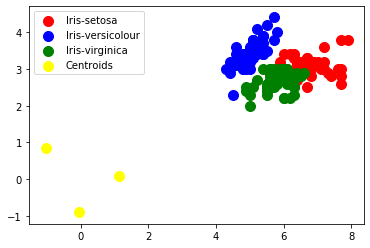

In [86]:
# Visualising the clusters - On the first two columns
pt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
pt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
pt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
pt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

pt.legend()